**imbalanced-learn - Intall the library to work with imbalanced data**

In [38]:
pip install imbalanced-learn

In [39]:
#import necessary libraries to work with SVM
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [40]:
#Create a synthetic dataset with 2 clusters of data
x,y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

**Hard Margin SVM**


In [41]:
#Hard margin SVM with linear kernal and train the model with x,y data
svm_hard_margin = SVC(kernel='linear',C=1e6)
svm_hard_margin.fit(x,y)

SVC(C=1000000.0, kernel='linear')

In [42]:
def svm_boundary(x,y,model,ax,title):
  """
visualize the decision boundry and margins
  Args:
    x: input data with two features (2D array)
    y: class label
    model: trained svm model
    ax: axis object from subplots
    title: title of the plot
  """

  cmap = ListedColormap(['purple','yellow'])
  #Scatter plot of data points with different colors for classes
  ax.scatter(x[:,0],x[:,1],c=y,s=50,cmap=cmap,edgecolors='k')
  ax.set_title(title)

  #gets x and y limits of plot area
  xlim=ax.get_xlim()
  ylim=ax.get_ylim()

  #Creating grid points spanning the plot area
  xx,yy=np.meshgrid(np.linspace(xlim[0],xlim[1],50),
                    np.linspace(ylim[0],ylim[1],50))

  #Decision function evaluates the distance of points from the decision boundary
  z=model.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

  #set line styles for decision boundary and margins
  ax.contour(xx,yy,z,levels=[-1,0,1],linestyles=['--','-','--'],colors='k')

  #Highlight the support vectors
  ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=100,facecolors='none',edgecolors='k',linewidths=1.5)


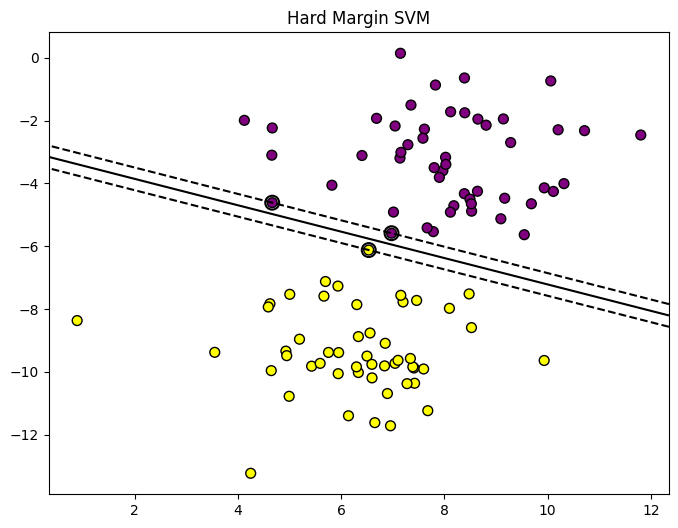

In [43]:
fig,ax = plt.subplots(figsize=(8,6))
svm_boundary(x,y,svm_hard_margin,ax,'Hard Margin SVM')
plt.show()

**Soft Margin SVM - with different C values**

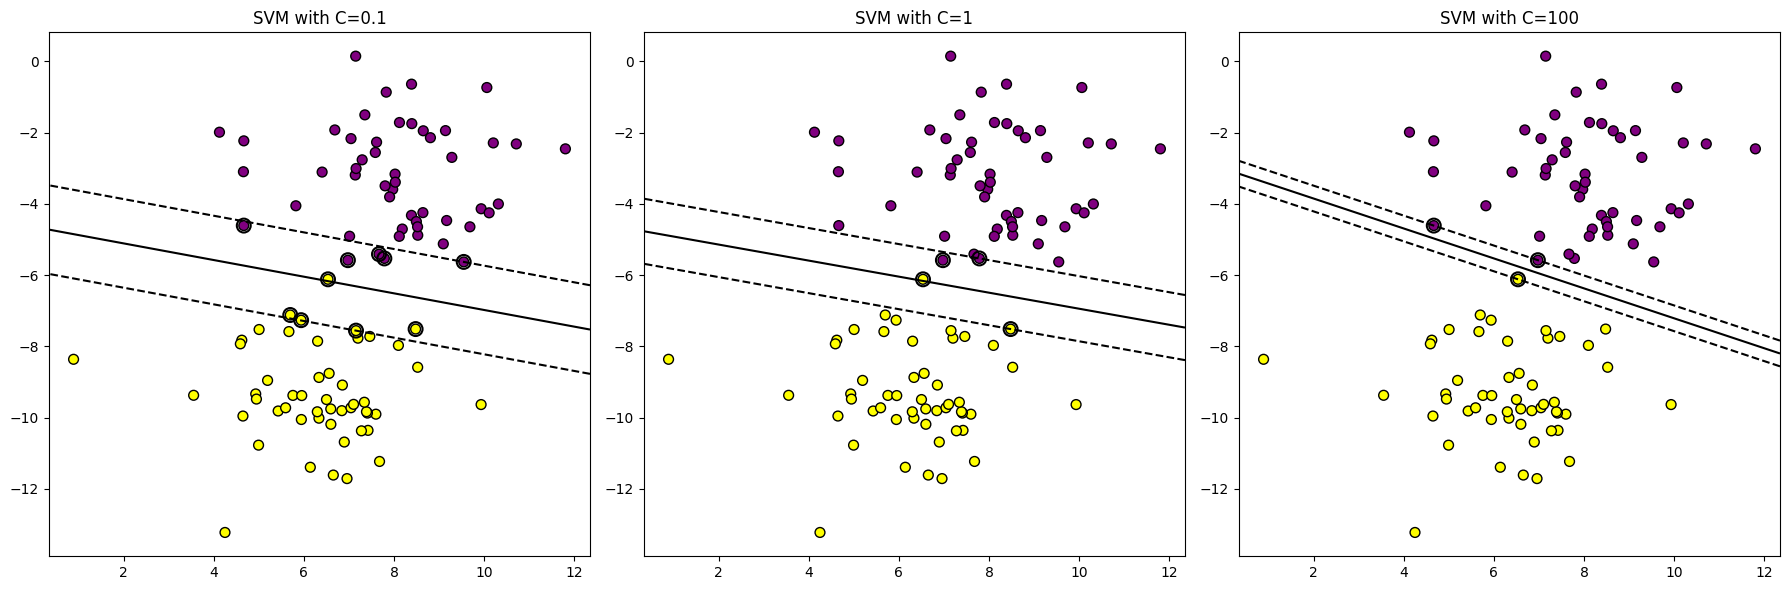

In [44]:
fig,axes = plt.subplots(1,3,figsize=(18,6))

#list of C values to test margin changes
c_values = [0.1,1,100]

misclassified_points ={}

#Loop through each C value, train the model, and plot the decision boundry
for i,c in enumerate(c_values):
    svm = SVC(kernel='linear',C=c)
    svm.fit(x,y)
    svm_boundary(x, y, model=svm, ax=axes[i], title=f"SVM with C={c}")

    #Count the number of misclassified points
    misclassified =(svm.predict(x)!= y).sum()
    misclassified_points[c]=misclassified

plt.tight_layout()
plt.show()



In [45]:
#print the missclassified points
for C,misclassified in misclassified_points.items():
    print(f"Misclassified points for C={C}:{misclassified}")

Misclassified points for C=0.1:1
Misclassified points for C=1:1
Misclassified points for C=100:0


**Test SVM on Online Retail Dataset with Different C values**

In [47]:
#Online Retail Dataset from UCI Machine Learning Repository
df= pd.read_csv('Online Retail.csv', encoding='latin1')

In [151]:
df = df.dropna()
df_online_retail=df.copy()
#Calculate the total amount
df_online_retail['Total'] = df_online_retail['Quantity'] * df_online_retail['UnitPrice']
df_online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France,16.60


In [153]:
#handling inconsistant date time
df_online_retail['InvoiceDate'] = pd.to_datetime(df_online_retail['InvoiceDate'],errors='coerce')


In [154]:
# group by customer Id and get the invoice count, sum of the total amounts and
# The different between min and max invoice dates for each customer
online_customer_summary = df_online_retail.groupby('CustomerID').agg({
    'InvoiceNo' : 'count',
    'Total' : 'sum',
    'InvoiceDate' : lambda x:(x.max() - x.min()).days
}).reset_index()
online_customer_summary

,CustomerID,InvoiceNo,Total,InvoiceDate
0,12346.0,2,0.00,NaN
1,12347.0,182,4310.00,420.0
2,12348.0,31,1797.24,0.0
3,12349.0,73,1757.55,NaN
4,12350.0,17,334.40,0.0
...,...,...,...,...
4367,18280.0,10,180.60,0.0
4368,18281.0,7,80.82,0.0
4369,18282.0,13,176.60,208.0
4370,18283.0,756,2094.88,155.0


In [155]:
online_retail_summary = online_customer_summary [(online_customer_summary['InvoiceDate']>0)]
online_customer_summary

,CustomerID,InvoiceNo,Total,InvoiceDate
0,12346.0,2,0.00,NaN
1,12347.0,182,4310.00,420.0
2,12348.0,31,1797.24,0.0
3,12349.0,73,1757.55,NaN
4,12350.0,17,334.40,0.0
...,...,...,...,...
4367,18280.0,10,180.60,0.0
4368,18281.0,7,80.82,0.0
4369,18282.0,13,176.60,208.0
4370,18283.0,756,2094.88,155.0


In [156]:
#set the threshold value to select the customer class(frequent byers or not) based on invoice count
threshold = 200
online_retail_summary=online_customer_summary.copy()
online_retail_summary['Frequent_Byer']= (online_retail_summary['InvoiceNo']>threshold).astype(int)
online_retail_summary['Frequent_Byer'].value_counts()

,count
Frequent_Byer,
0,3901
1,471


In [157]:
#Scale invoiceNo and TotalAmount using minmax scaler
scaler = MinMaxScaler()
scaled_summary=scaler.fit_transform(online_retail_summary[['InvoiceNo', 'Total']])

In [158]:
#Divide into train and test data
x_train,x_test,y_train,y_test = train_test_split(scaled_summary, online_retail_summary['Frequent_Byer'],test_size=0.2,random_state=1)

In [159]:
smote = SMOTE(random_state=1)
#resample training data
x_res, y_res =smote.fit_resample(x_train,y_train)

In [160]:
#Use linear kernal SVM and train the model with resampled data
model = SVC(kernel='linear', C=1)
model.fit(x_res,y_res)

SVC(C=1, kernel='linear')

In [161]:
# model predict the class lable for test data
y_pred = model.predict(x_test)

In [162]:
accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy score : {accuracy}")

accuracy score : 0.9897142857142858


In [163]:
print(f"{confusion_matrix(y_test,y_pred)}")

[[779   8]
 [  1  87]]
